# Polynomial Regression -Overfitting

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression

In [1]:
# Some useful Imports

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

$y = 2.5 + X - 0.5 * X^2 + noise$

In [3]:
ndata = 100
X = 6 * np.random.rand(ndata, 1) - 3
y = -0.5 * X**2 + X + 2.5 + np.random.randn(ndata, 1)*0.4

In [4]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

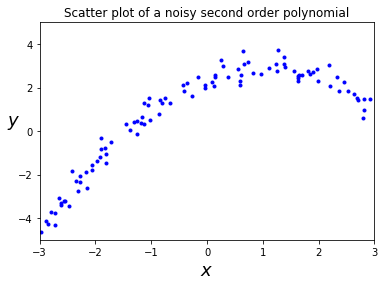

In [5]:
plt.plot(X, y, "b.", linewidth=3)

# plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -5, 5])
plt.title('Scatter plot of a noisy second order polynomial')
plt.savefig('fig_5_1a.jpg', dpi=1200)
plt.show()

$y = \beta_{0} + \beta_{1}*X$

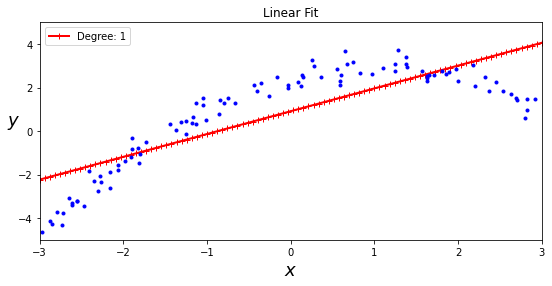

In [6]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

plt.subplots(figsize=(9,4))
style, width, degree = ("r-+", 2, 1)
polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
# std_scaler = StandardScaler()
lin_reg = LinearRegression()
#   polynomial_regression = Pipeline([
#            ("poly_features", polybig_features),
#            ("std_scaler", std_scaler),
#            ("lin_reg", lin_reg),
#        ])
X_poly = polybig_features.fit_transform(X)
lin_reg.fit(X_poly, y)
X_new_poly = polybig_features.transform(X_new)
yhat_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, yhat_new, style, label='Degree: '+str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)

# plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -5, 5])
plt.legend()
plt.title('Linear Fit')
plt.savefig('fig_5_1b.jpg', dpi=1200)
plt.show()

$y = \beta_{0} + \beta_{1}*X + \beta_{2}* X^2$

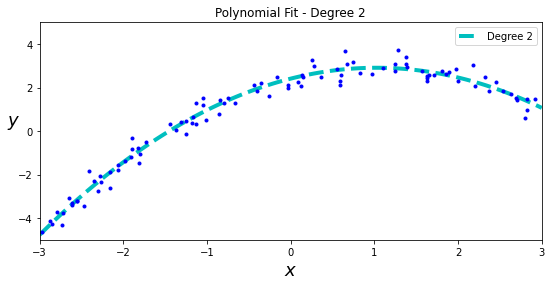

In [7]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# plt.figure(figsize=(12,9))
plt.subplots(figsize=(9,4))
style, width, degree = ("c--", 4, 2)
polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
# std_scaler = StandardScaler()
lin_reg = LinearRegression()
#   polynomial_regression = Pipeline([
#            ("poly_features", polybig_features),
#            ("std_scaler", std_scaler),
#            ("lin_reg", lin_reg),
#        ])
X_poly = polybig_features.fit_transform(X)
lin_reg.fit(X_poly, y)
X_new_poly = polybig_features.transform(X_new)
yhat_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, yhat_new, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.")

# plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -5, 5])
plt.title('Polynomial Fit - Degree 2')
plt.legend(['Degree 2'])
plt.savefig('fig_5_1c.jpg', dpi=1200)
plt.show()

$y = \beta_{0} + \beta_{1}*X + \beta_{2}* X^2 + ... + \beta_{100}* X^{100}$

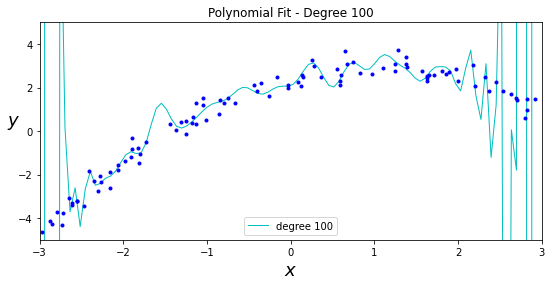

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# plt.figure(figsize=(12,9))
# for style, width, degree in (("g-", 1, 300), ("b--", 2, 3), ("r-+", 2, 1)):
style, width, degree = ("c-", 1, 100)
plt.subplots(figsize=(9,4))
polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)

plt.legend(loc="upper left")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -5, 5])
plt.title('Polynomial Fit - Degree 100')
plt.legend(['degree 100'])
plt.savefig('fig_5_1d.jpg', dpi=1200)
plt.show()